---
# ========== [ Weather Data ] ===============
---

### While exploring the Aerial Bombing Operations of World War Two dataset and recalling that the D-Day landings were nearly postponed due to poor weather, I downloaded these weather reports from the period to compare with missions in the bombing operations dataset.

### The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunderstorms or other poor weather conditions.

### So our task is to predict the maximum temperature taking input feature as the minimum temperature.

---
## # import the required libraries

In [4]:
import numpy as np
import pandas as pd

In [5]:
# open n read the datasets
dataset=pd.read_csv("Data/Weather.csv")

#### Apply descriptive statitics

In [6]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.tail()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119039,82506,1945-12-31,0,NaN,29.444444,17.222222,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# no of rows n columns in our datasets
dataset.shape

(119040, 31)

### You should receive output as (119040, 31), which means the data contains 119040 rows and 31 columns.

In [9]:
# statistical details of the dataset
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

---
## Data Visualization

### let’s plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data 

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### We have taken MinTemp and MaxTemp for doing our analysis

<Figure size 1152x648 with 0 Axes>

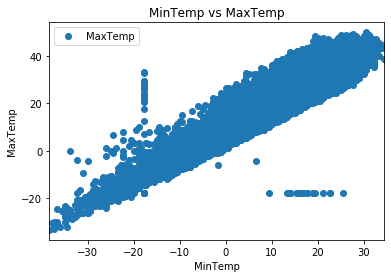

In [12]:
plt.figure(figsize=(16,9))
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

### check the average max temperature and once we plot it we can observe that the Average Maximum Temperature is Between Nearly 25 and 35

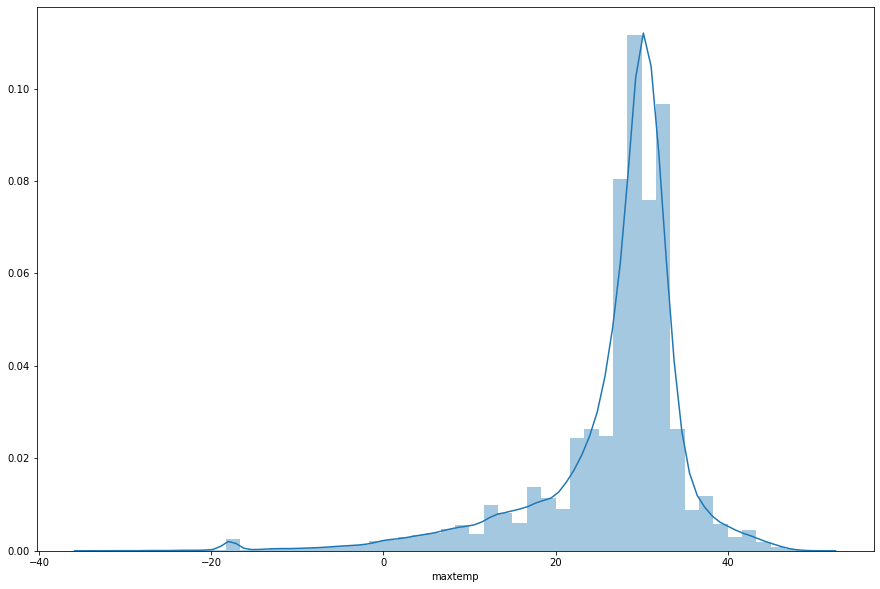

In [13]:
plt.figure(figsize=(15,10))
#plt.tight_layout()
sns.distplot(dataset['MaxTemp']);
plt.xlabel('maxtemp')
plt.show()

### check the average max temperature and once we plot it we can observe that the Average Maximum Temperature is Between Nearly 25 and 35

In [14]:
X=dataset['MinTemp'].values.reshape(-1,1)
y=dataset['MaxTemp'].values.reshape(-1,1)
print(X.shape)
print(y.shape)

(119040, 1)
(119040, 1)


---
## Split the data

### we split 80% of the data to the training set while 20% of the data to test set using below code.
### The test_size variable is where we actually specify the proportion of the test set.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

---
## Train The Model or Algorithm

### After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

## Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train) # train the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### As we have know that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset

In [18]:
# To retrieve the intercept
print(linreg.intercept_)

[10.66185201]


In [19]:
# for retrieveing the slope
print(linreg.coef_)

[[0.92033997]]


### The result should be approximately 10.66185201 and 0.92033997 respectively.

### This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

### Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data

In [20]:
y_pred=linreg.predict(X_test)

### Now compare the actual output values for X_test with the predicted values

In [21]:
df=pd.DataFrame({'Actual': y_test.flatten(),
                'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


### We can also visualize comparison result as a bar graph

### Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

<Figure size 1152x720 with 0 Axes>

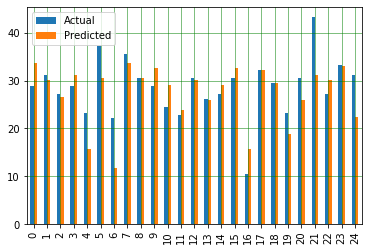

In [22]:
df1=df.head(25)
plt.figure(figsize=(16,10))
df1.plot(kind='bar')
plt.grid(which='major',linestyle='-', linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':', linewidth='0.5',color='black')
plt.show()

### Though our model is not very precise, the predicted percentages are close to the actual ones.

### Let's plot our straight line with the test data :

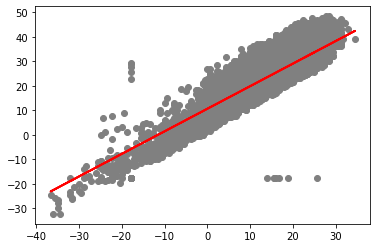

In [23]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

### The straight line in the above graph shows our algorithm is correct.

---
# Final Step

### The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

---
## 1. Mean Absolute Error (MAE) :

### (MAE) is the mean of the absolute value of the errors. It is calculated as:

<img src="images/3.png" >

## 2. Mean Squared Error (MSE)

### (MSE) is the mean of the squared errors and is calculated as:

<img src="images/4.png">

## 3. Root Mean Squared Error (RMSE):

### (RMSE) is the square root of the mean of the squared errors:

<img src="images/5.gif">

### we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us

### find the values for these metrics using our test data.

In [24]:
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))
print()
print("Mean Squared Erroe : ",metrics.mean_squared_error(y_test,y_pred))
print()
print("Root mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error :  3.1993291783785835

Mean Squared Erroe :  17.631568097568532

Root mean Squared Error :  4.198996082109215


### You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.